In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_no_spaces_all_features_correct_dates.csv to data_no_spaces_all_features_correct_dates.csv


In [5]:
import pandas as pd


df = pd.read_csv('data_no_spaces_all_features_correct_dates.csv')

print(df.head())

print("\nDataframe Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

   Unnamed: 0                                 channelDescription  \
0           0  Business inquiries only: info@nikkietutorials....   
1           1  Business inquiries only: info@nikkietutorials....   
2           2  Business inquiries only: info@nikkietutorials....   
3           3  Business inquiries only: info@nikkietutorials....   
4           4  Business inquiries only: info@nikkietutorials....   

  channelJoinedDate  channelTotalVideos  channelTotalViews  channelUsername  \
0      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
1      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
2      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
3      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
4      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   

   commentsCount                      date  duration           id  ...  \
0         1844.0  2025-01-01T17:03:25.000Z

In [6]:
df.head(2)

,Unnamed: 0,channelDescription,channelJoinedDate,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,...,hashtags,comm_to_views,likes_to_views,popular_brand,has_title_affiliate,has_description_affiliate,has_channel_description_affiliate,has_any_affiliate,has_business_inquiry,engagement_per_subscriber
0,0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,...,0,0.000173,0.077528,0,0,0,0,0,1,0.056438
1,1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,...,0,0.000251,0.063624,0,0,0,0,0,1,0.032055


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]


print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print("\nColumn names:", df.columns.tolist())



Dataset contains 15046 rows and 33 columns

Column names: ['Unnamed: 0', 'channelDescription', 'channelJoinedDate', 'channelTotalVideos', 'channelTotalViews', 'channelUsername', 'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount', 'likes_per_subscriber', 'comments_per_subscriber', 'views_per_subscriber', 'duration_in_seconds', 'datetime_date', 'hashtags', 'comm_to_views', 'likes_to_views', 'popular_brand', 'has_title_affiliate', 'has_description_affiliate', 'has_channel_description_affiliate', 'has_any_affiliate', 'has_business_inquiry', 'engagement_per_subscriber']



Correlation Matrix:
               viewCount     likes  commentsCount      hour  day_of_week  \
viewCount       1.000000  0.925233       0.463526 -0.026616     0.020331   
likes           0.925233  1.000000       0.481566 -0.022269     0.017301   
commentsCount   0.463526  0.481566       1.000000 -0.011660     0.026500   
hour           -0.026616 -0.022269      -0.011660  1.000000    -0.024664   
day_of_week     0.020331  0.017301       0.026500 -0.024664     1.000000   
month           0.009095  0.009434      -0.009496  0.005149    -0.008697   
year           -0.043754 -0.040731      -0.012558 -0.027723     0.011480   

                  month      year  
viewCount      0.009095 -0.043754  
likes          0.009434 -0.040731  
commentsCount -0.009496 -0.012558  
hour           0.005149 -0.027723  
day_of_week   -0.008697  0.011480  
month          1.000000 -0.662240  
year          -0.662240  1.000000  


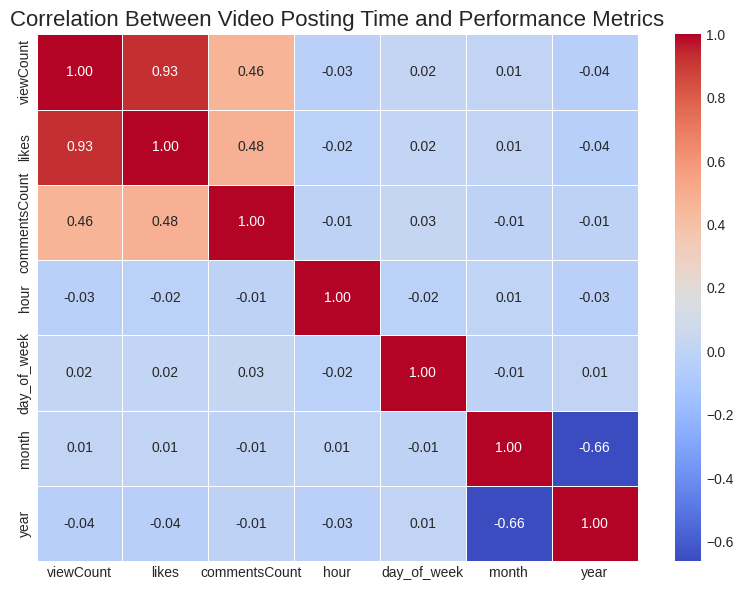

In [8]:

df1 = df.copy()

df1['datetime'] = pd.to_datetime(df['date'])

df1['hour'] = df1['datetime'].dt.hour
df1['day_of_week'] = df1['datetime'].dt.dayofweek  # 0 is Monday, 6 is Sunday
df1['month'] = df1['datetime'].dt.month
df1['year'] = df1['datetime'].dt.year

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df1['day_name'] = df1['day_of_week'].apply(lambda x: day_names[int(x)] if pd.notnull(x) else None)

numeric_columns = ['viewCount', 'likes', 'commentsCount', 'hour', 'day_of_week', 'month', 'year']
numeric_df = df1[numeric_columns].copy()

correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Video Posting Time and Performance Metrics', fontsize=16)
plt.tight_layout()
plt.savefig('time_correlation_heatmap.png')
plt.show()










In [9]:
df1.columns

Index(['Unnamed: 0', 'channelDescription', 'channelJoinedDate',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'likes_per_subscriber', 'comments_per_subscriber',
       'views_per_subscriber', 'duration_in_seconds', 'datetime_date',
       'hashtags', 'comm_to_views', 'likes_to_views', 'popular_brand',
       'has_title_affiliate', 'has_description_affiliate',
       'has_channel_description_affiliate', 'has_any_affiliate',
       'has_business_inquiry', 'engagement_per_subscriber', 'datetime', 'hour',
       'day_of_week', 'month', 'year', 'day_name'],
      dtype='object')

<ipython-input-10-ceb3566287f0>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-10-ceb3566287f0>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-10-ceb3566287f0>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


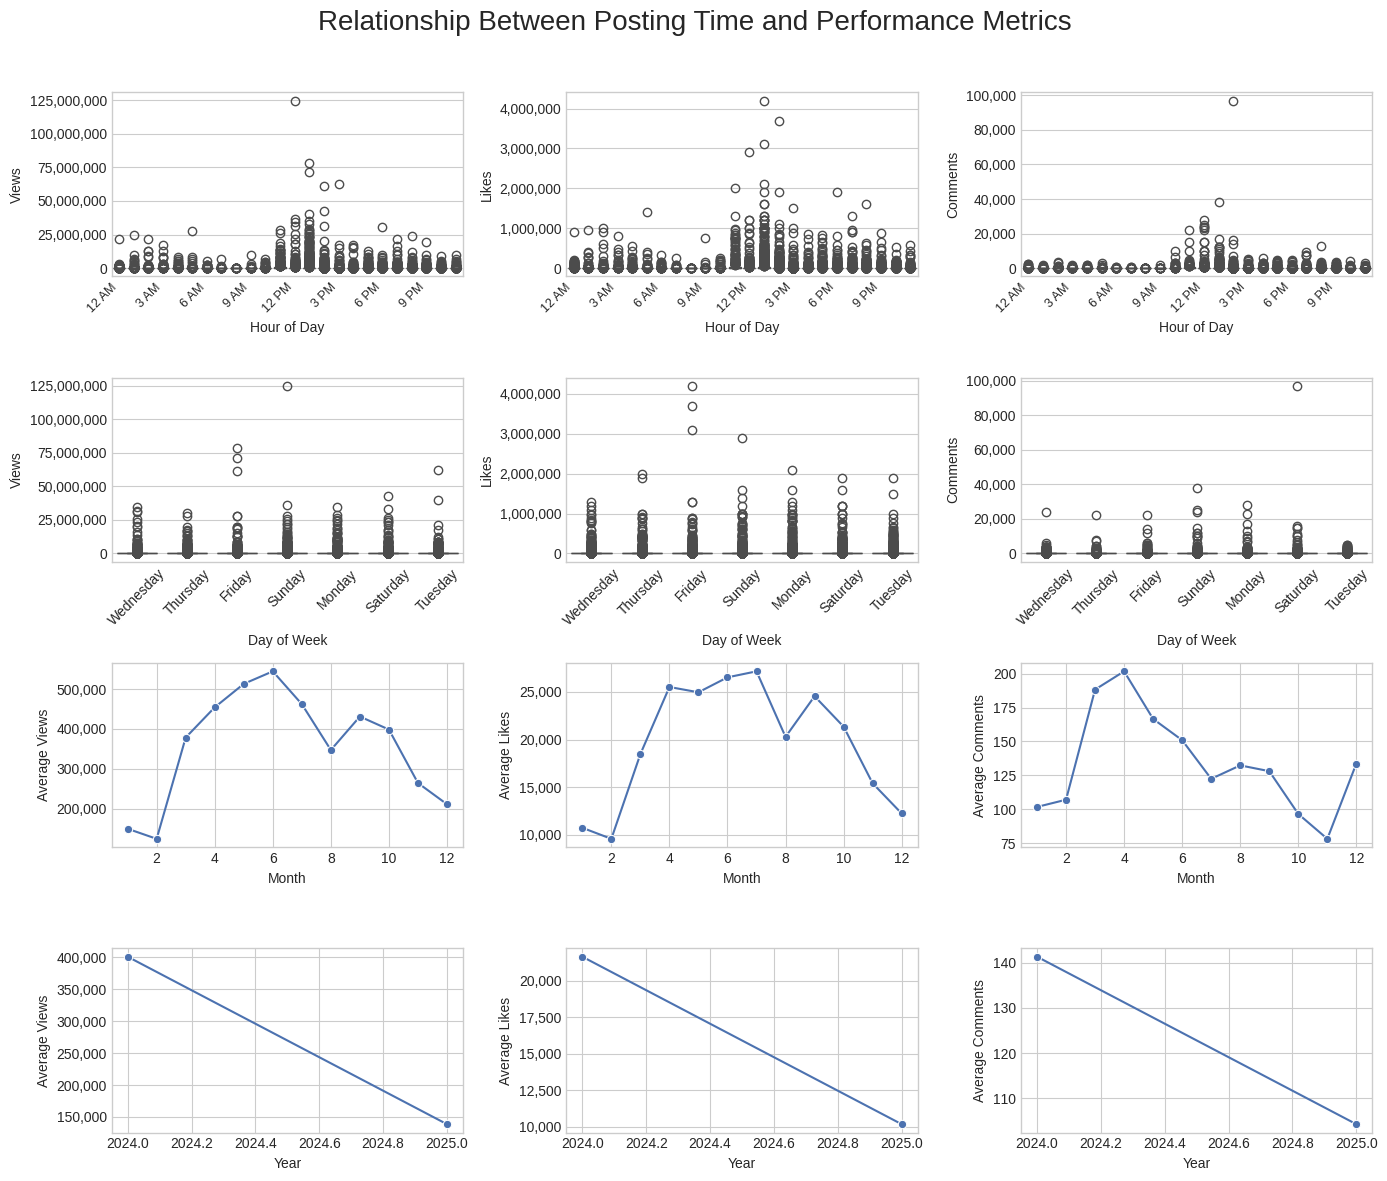

In [10]:
time_elements = ['hour', 'day_of_week', 'month', 'year']
performance_metrics = ['viewCount', 'likes', 'commentsCount']

fig, axes = plt.subplots(len(time_elements), len(performance_metrics), figsize=(14, 12))
fig.suptitle('Relationship Between Posting Time and Performance Metrics', fontsize=20)

for i, time_element in enumerate(time_elements):
    for j, metric in enumerate(performance_metrics):
        ax = axes[i, j]

        if time_element in ['hour', 'day_of_week']:
            if time_element == 'day_of_week':
                temp_df = df1.copy()
                temp_df['day_category'] = temp_df['day_name']
                sns.boxplot(x='day_category', y=metric, data=temp_df, ax=ax)
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

            else:
                sns.boxplot(x=time_element, y=metric, data=df1, ax=ax)

                hour_ticks = range(0, 24, 3)  # Show every 3 hours
                hour_labels = []
                for h in hour_ticks:
                    if h == 0:
                        hour_labels.append("12 AM")
                    elif h < 12:
                        hour_labels.append(f"{h} AM")
                    elif h == 12:
                        hour_labels.append("12 PM")
                    else:
                        hour_labels.append(f"{h-12} PM")

                ax.set_xticks(hour_ticks)
                ax.set_xticklabels(hour_labels, rotation=45, ha='right', fontsize=9)

            if metric == 'viewCount':
                ax.set_ylabel('Views')
            elif metric == 'commentsCount':
                ax.set_ylabel('Comments')
            else:
                ax.set_ylabel(metric.capitalize())

            if time_element == 'hour':
                ax.set_xlabel('Hour of Day')
            elif time_element == 'day_of_week':
                ax.set_xlabel('Day of Week')
            else:
                ax.set_xlabel(time_element.capitalize())

            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

        else:
            grouped = df1.groupby(time_element)[metric].mean().reset_index()
            sns.lineplot(x=time_element, y=metric, data=grouped, marker='o', ax=ax)

            if metric == 'viewCount':
                ax.set_ylabel('Average Views')
            elif metric == 'commentsCount':
                ax.set_ylabel('Average Comments')
            else:
                ax.set_ylabel(f'Average {metric.capitalize()}')

            ax.set_xlabel(time_element.capitalize())

            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('time_performance_relationships.png')
plt.show()

# **Best Hours for YouTube Performance**
**Views Optimization:**


---


**Prime Time:** 12-3 PM shows highest concentration of successful videos

**Strong Period:** 12 AM - 3 PM consistently outperforms other hours

**Avoid**: Early morning (6-8 AM) shows poorest performance



---



**Engagement Patterns:**

Likes and comments peak around 12-3 PM

Midday posting (12-3 PM) specifically encourages viewer discussion

Morning and evening hours show notably lower engagement


---


**Key Insight:** Videos posted at 12-3 PM have the highest potential for exceptional performance, with the platform's most-viewed content (125M+ views) and highest engagement occurring during this hour.






#  Engagement by Day of the Week (Top Row)

There are significant outliers in all three metrics, indicating that certain posts receive exceptionally high engagement.
The overall distribution appears fairly consistent across days, suggesting that engagement levels do not drastically change based on the day of the week.
# Engagement Trends by Month (Bottom Row)

Seasonal Trends: People may watch and like more content in the summer months (May–July), but they engage in discussions (comments) earlier in the year.

Content Type: Certain content types may encourage more commenting in early months, while others drive views and likes in the summer.

 Viewers might be more passive (watching and liking) during summer but more engaged in discussions earlier.
# Key Takeaways
Engagement is relatively steady across weekdays, but certain posts receive exceptional engagement (outliers).
Mid-year (May to July) sees higher average engagement, possibly due to seasonal trends or increased social media activity.

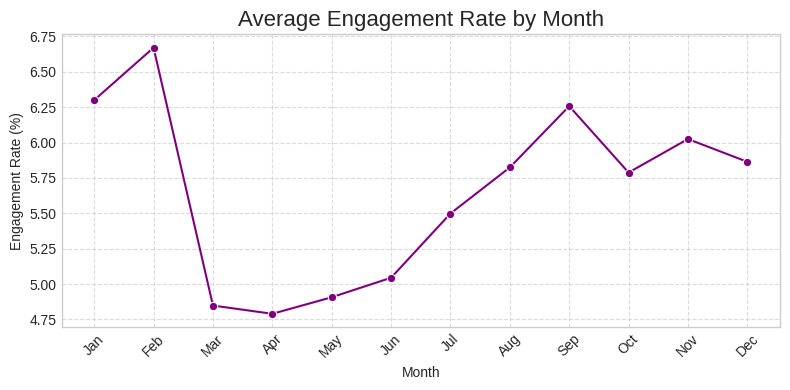

Best month for engagement: Feb (6.67% engagement rate)


In [11]:

df1['engagement_rate'] = (df1['likes'] + df1['commentsCount']) / df1['viewCount'] * 100

monthly_metrics = df1.groupby('month').agg({
    'engagement_rate': 'mean'
}).reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_metrics['month_name'] = monthly_metrics['month'].apply(lambda x: month_names[int(x)-1] if pd.notnull(x) else None)

plt.figure(figsize=(8, 4))
sns.lineplot(x='month_name', y='engagement_rate', data=monthly_metrics, marker='o', color='purple')
plt.title('Average Engagement Rate by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_by_month.png')
plt.show()

best_month_engagement = monthly_metrics.loc[monthly_metrics['engagement_rate'].idxmax()]
print(f"Best month for engagement: {best_month_engagement['month_name']} ({best_month_engagement['engagement_rate']:.2f}% engagement rate)")

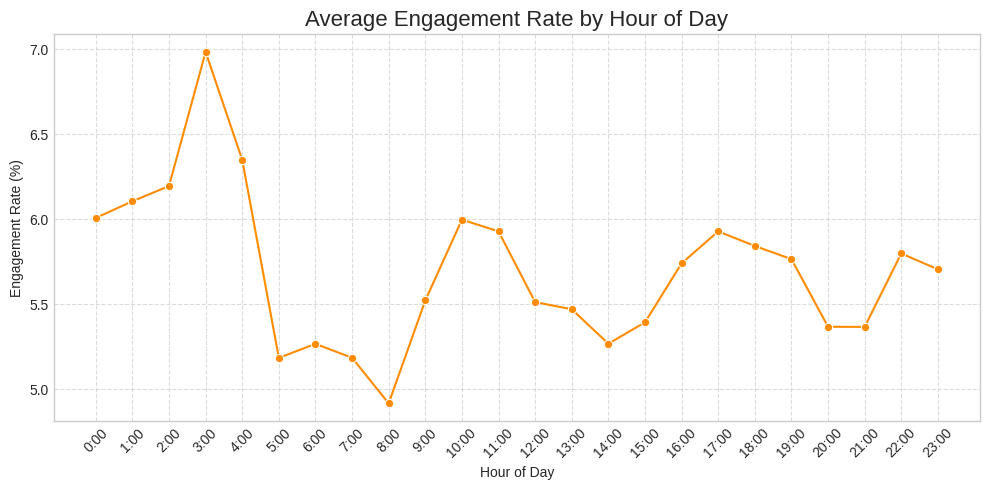

Best hour for engagement: 3:00 (6.98% engagement rate)


In [12]:
hourly_metrics = df1.groupby('hour').agg({
    'engagement_rate': 'mean'
}).reset_index()

hourly_metrics['hour_label'] = hourly_metrics['hour'].apply(lambda x: f"{int(x)}:00")

plt.figure(figsize=(10, 5))
sns.lineplot(x='hour_label', y='engagement_rate', data=hourly_metrics, marker='o', color='darkorange')
plt.title('Average Engagement Rate by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_by_hour.png')
plt.show()

best_hour_engagement = hourly_metrics.loc[hourly_metrics['engagement_rate'].idxmax()]
print(f"Best hour for engagement: {int(best_hour_engagement['hour'])}:00 ({best_hour_engagement['engagement_rate']:.2f}% engagement rate)")

In [16]:
hourly_stats = df1.groupby('hour').agg({
    'id': 'count',
    'viewCount': 'sum',
    'likes': 'sum',
    'commentsCount': 'sum'
}).reset_index()

hourly_stats.rename(columns={'id': 'videos'}, inplace=True)

hourly_stats['avg_views'] = hourly_stats['viewCount'] / hourly_stats['videos']
hourly_stats['avg_likes'] = hourly_stats['likes'] / hourly_stats['videos']
hourly_stats['avg_comments'] = hourly_stats['commentsCount'] / hourly_stats['videos']

hourly_stats['engagement'] = (hourly_stats['likes'] + hourly_stats['commentsCount']) / hourly_stats['viewCount'] * 100

pd.set_option('display.float_format', '{:.2f}'.format)

table_data = hourly_stats[['hour', 'videos', 'viewCount', 'likes', 'commentsCount',
                           'avg_views', 'avg_likes', 'avg_comments', 'engagement']]

table_data.columns = ['Hour', 'Videos', 'Total Views', 'Total Likes', 'Total Comments',
                      'Avg Views', 'Avg Likes', 'Avg Comments', 'Engagement (%)']


from IPython.display import display
display(table_data)




,Hour,Videos,Total Views,Total Likes,Total Comments,Avg Views,Avg Likes,Avg Comments,Engagement (%)
0,0,432,76933218.00,4578358.00,26558.00,178086.15,10598.05,61.48,5.99
1,1,376,86498340.00,4231066.00,18602.00,230048.78,11252.84,49.47,4.91
2,2,378,95737916.00,5216796.00,22828.00,253274.91,13801.05,60.39,5.47
3,3,277,92489563.00,4580460.00,19167.00,333897.34,16535.96,69.19,4.97
4,4,303,60876287.00,3736030.00,16774.00,200911.84,12330.13,55.36,6.16
5,5,230,68558279.00,3520186.00,12063.00,298079.47,15305.16,52.45,5.15
6,6,220,23490751.00,1403658.00,5287.00,106776.14,6380.26,24.03,6.00
7,7,166,12382739.00,591514.00,2847.00,74594.81,3563.34,17.15,4.80
8,8,153,1138772.00,76264.00,911.00,7442.95,498.46,5.95,6.78
9,9,169,16322979.00,1097040.00,2829.00,96585.67,6491.36,16.74,6.74


In [17]:
prime_hours = [3, 4, 10,11, 16, 17, 18,19, 22, 23]  # Extracted from chart

df1['prime_time'] = df1['hour'].apply(lambda x: 1 if x in prime_hours else 0)


In [20]:
import pandas as pd

# Define threshold at the 75th percentile (Top 25%)
threshold = df1['engagement_rate'].quantile(0.75)

# Assign Prime Time (1) or Off-Peak (0)
df1['prime_time'] = (df1['engagement_rate'] >= threshold).astype(int)


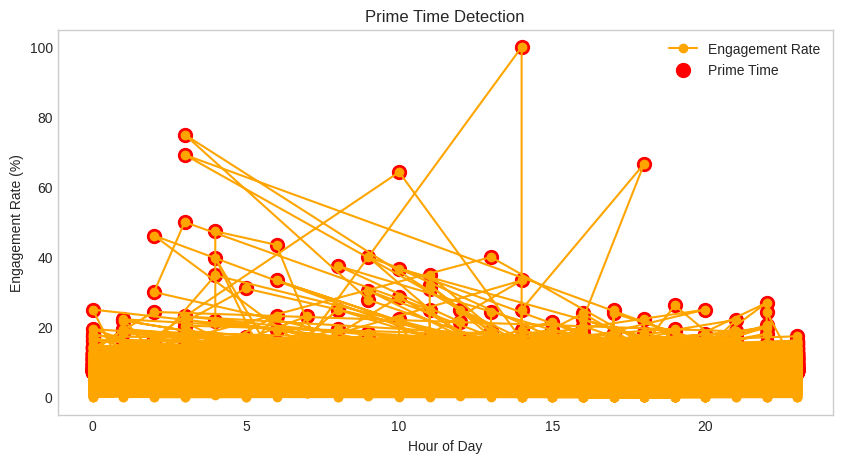

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df1['hour'], df1['engagement_rate'], marker='o', linestyle='-', color='orange', label='Engagement Rate')
plt.scatter(df1[df1['prime_time'] == 1]['hour'], df1[df1['prime_time'] == 1]['engagement_rate'], color='red', label='Prime Time', s=100)
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Rate (%)")
plt.title("Prime Time Detection")
plt.legend()
plt.grid()
plt.show()


Key Insights from Your Plot
✅ Engagement Spikes: Certain hours (e.g., 4 AM, 10 AM, 3 PM) see higher engagement rates.
✅ Prime Time is Scattered: Engagement is not concentrated in a single time block—it happens at multiple hours.
✅ Outliers Exist: A few hours show very high engagement, which could be driven by specific content types or audience behavior.

In [26]:

Q1 = df1["engagement_rate"].quantile(0.25)
Q3 = df1["engagement_rate"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


iqr_outliers = df1[(df1["engagement_rate"] < lower_bound) | (df1["engagement_rate"] > upper_bound)]


print(f"Number of outliers detected using IQR method: {len(iqr_outliers)}")


Number of outliers detected using IQR method: 516


In [27]:
print(iqr_outliers.head())

     Unnamed: 0                                 channelDescription  \
10           10  RawBeautyKristi - A place where you can feel c...   
29           29  ✨ Welcome to the official YouTube Channel of D...   
264         323  💕your acne prone bestie\n📍nyc\n💌pr/collabs: ti...   
385         464  Hey Beauties! Welcome to my channel! I post a ...   
591         674  Formally known as kinkysweat, where I share al...   

    channelJoinedDate  channelTotalVideos  channelTotalViews  channelUsername  \
10       Feb 28, 2013              888.00       174562078.00  RawBeautyKristi   
29       Jul 15, 2011              559.00         2415179.00    DanaRipperton   
264      May 25, 2022               41.00          153216.00     tiffanycglow   
385      Feb 12, 2017              232.00         7113348.00   kristenmarieco   
591       Sep 3, 2009             1358.00        16183165.00     aliciaarcher   

     commentsCount                      date  duration           id  ...  \
10           40.

In [29]:
from sklearn.cluster import KMeans


X = df1[['hour', 'engagement_rate']].values


kmeans = KMeans(n_clusters=2, random_state=42)
df1['cluster1'] = kmeans.fit_predict(X)


df1['prime_time1'] = (df1.groupby('cluster1')['engagement_rate'].transform('mean') == df1.groupby('cluster1')['engagement_rate'].transform('mean').max()).astype(int)


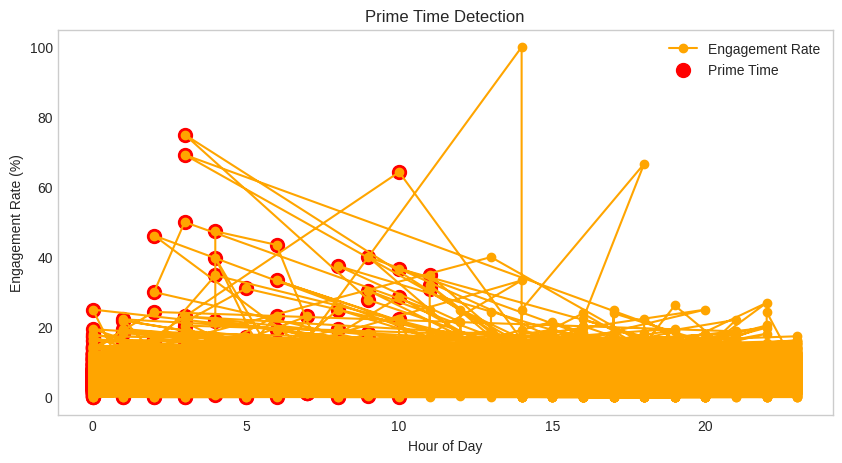

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df1['hour'], df1['engagement_rate'], marker='o', linestyle='-', color='orange', label='Engagement Rate')
plt.scatter(df1[df1['prime_time1'] == 1]['hour'], df1[df1['prime_time1'] == 1]['engagement_rate'], color='red', label='Prime Time', s=100)
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Rate (%)")
plt.title("Prime Time Detection")
plt.legend()
plt.grid()
plt.show()


In [31]:

Q1 = df1["engagement_rate"].quantile(0.25)
Q3 = df1["engagement_rate"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


iqr_outliers = df1[(df1["engagement_rate"] < lower_bound) | (df1["engagement_rate"] > upper_bound)]


print(f"Number of outliers detected using IQR method: {len(iqr_outliers)}")


Number of outliers detected using IQR method: 516


In [34]:

# Create a single categorical column for time engagement categories
df1['posting_time_category'] = 'standard_hours'  # default value

# Prime Time (1-3 AM) - highest engagement hours
df1.loc[df1['hour'].isin([1, 2, 3]), 'posting_time_category'] = 'prime_time'

# Good Performance Time (9-11 AM and 14-17 PM) - medium engagement hours
df1.loc[df1['hour'].isin([9, 10, 11, 14, 15, 16, 17]), 'posting_time_category'] = 'good_performance_time'

# Poor Performance Time (5-8 AM) - lowest engagement hours
df1.loc[df1['hour'].isin([5, 6, 7, 8]), 'posting_time_category'] = 'poor_performance_time'

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



# 1. ANOVA to test
from scipy.stats import f_oneway

# Group data by hour and create lists of engagement rates for each hour
hour_groups = [df1[df1['hour'] == hour]['engagement_rate'].values for hour in range(24)]
# Remove any empty groups
hour_groups = [group for group in hour_groups if len(group) > 0]


f_stat, p_value = f_oneway(*hour_groups)
print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")
print(f"Hours significantly affect engagement rate: {p_value < 0.05}")

# 2. Pairwise t-tests
df_for_tukey = df1[['hour', 'engagement_rate']].copy()
df_for_tukey['hour'] = df_for_tukey['hour'].astype(str)  # Convert hour to string for the test

tukey_results = pairwise_tukeyhsd(
    df_for_tukey['engagement_rate'],
    df_for_tukey['hour'],
    alpha=0.05
)

print(tukey_results)


prime_hours = [3, 4, 10, 11, 16, 17, 18, 19, 22, 23]


prime_engagement = df1[df1['hour'].isin(prime_hours)]['engagement_rate']
non_prime_engagement = df1[~df1['hour'].isin(prime_hours)]['engagement_rate']

# Perform t-test
t_stat, p_value = stats.ttest_ind(prime_engagement, non_prime_engagement, equal_var=False)
print(f"T-test results (prime vs non-prime): t-statistic = {t_stat}, p-value = {p_value}")
print(f"Prime time hours significantly differ from non-prime: {p_value < 0.05}")


mean_diff = prime_engagement.mean() - non_prime_engagement.mean()
pooled_std = np.sqrt(((len(prime_engagement) - 1) * prime_engagement.std()**2 +
                     (len(non_prime_engagement) - 1) * non_prime_engagement.std()**2) /
                     (len(prime_engagement) + len(non_prime_engagement) - 2))
cohens_d = mean_diff / pooled_std

print(f"Mean engagement difference: {mean_diff:.2f} percentage points")
print(f"Cohen's d (effect size): {cohens_d:.2f}")

ANOVA results: F-statistic = 6.364443791002237, p-value = 7.835363517416321e-20
Hours significantly affect engagement rate: True


/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    0.098    1.0 -0.8056  1.0015  False
     0     10    -0.01    1.0 -1.2182  1.1981  False
     0     11  -0.0788    1.0 -1.0045  0.8469  False
     0     12  -0.4952 0.9091 -1.3473   0.357  False
     0     13  -0.5371 0.5582  -1.275  0.2008  False
     0     14  -0.7398  0.021 -1.4327  -0.047   True
     0     15  -0.6141 0.2244 -1.3306  0.1025  False
     0     16   -0.267 0.9998 -0.9959  0.4619  False
     0     17   -0.079    1.0  -0.799  0.6409  False
     0     18  -0.1649    1.0 -0.8935  0.5637  False
     0     19  -0.2422    1.0 -0.9819  0.4975  False
     0      2   0.1878    1.0 -0.7145    1.09  False
     0     20  -0.6402 0.2196 -1.3851  0.1047  False
     0     21   -0.641  0.234 -1.3931  0.1112  False
     0     22  -0.2088    1.0 -0.9808  0.5633  False
     0     23  -0.3024 0.9997 -1.1136  0.5088 

In [35]:
df1.columns

Index(['Unnamed: 0', 'channelDescription', 'channelJoinedDate',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'likes_per_subscriber', 'comments_per_subscriber',
       'views_per_subscriber', 'duration_in_seconds', 'datetime_date',
       'hashtags', 'comm_to_views', 'likes_to_views', 'popular_brand',
       'has_title_affiliate', 'has_description_affiliate',
       'has_channel_description_affiliate', 'has_any_affiliate',
       'has_business_inquiry', 'engagement_per_subscriber', 'datetime', 'hour',
       'day_of_week', 'month', 'year', 'day_name', 'engagement_rate',
       'prime_time', 'cluster1', 'prime_time1'],
      dtype='object')